In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_excel(r'C:\Users\adity\Documents\Machine Learning\Miltivarite Regression\cars.xls')
df1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [4]:
df1.shape

(804, 12)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
df1.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [7]:
df1.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [8]:
df1.duplicated().sum()

np.int64(0)

In [9]:
for i in df1.columns:

    print(df1[i].unique())

[17314.1031289  17542.03608328 16218.84786194 16336.91314005
 16339.17032393 15709.05282108 15230.00338985 15048.04218412
 14862.0938696  15295.01826688 21335.85248489 20538.08751023
 20512.09409124 19924.1590524  19774.24906607 19344.16553736
 19105.13012442 18543.42704537 17808.19899602 17968.83827826
 22358.87767812 23785.92252638 22926.09037126 21895.7587842
 21273.06171392 21460.01395289 21183.12358742 20406.09950289
 21058.13957995 19556.89932029 23447.68656101 23547.23944288
 23016.00800868 22230.02750256 22625.07356605 21799.17209689
 21341.25720707 21683.03146355 20986.01601748 20902.10379431
 20698.07708317 20099.25684484 18145.12648909 17944.85692346
 19027.86230543 18348.89857169 17750.88457463 17772.96968004
 17394.0213978  17645.74504414 21908.36662462 21956.34266271
 21646.11692355 21575.456827   20952.2178016  21562.04757786
 19981.12791142 19425.84861633 19191.98961685 19641.74190233
 25589.98315463 25098.62905715 23420.70694794 22661.04848508
 23493.082295   22435.202

In [10]:
df = df1

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


In [ ]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(include = np.number).columns.tolist()

print(cat_col)
print(num_col)

Index(['Make', 'Model', 'Trim', 'Type'], dtype='object')
['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


Price


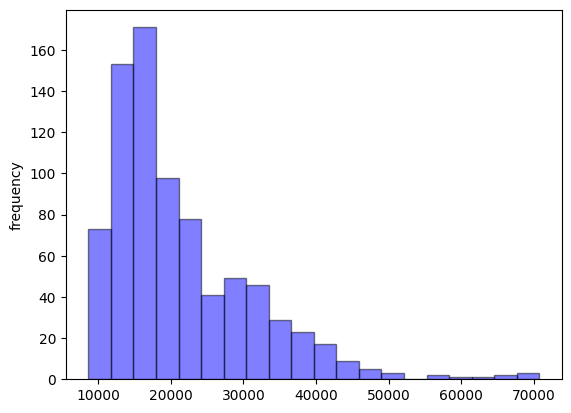

Mileage


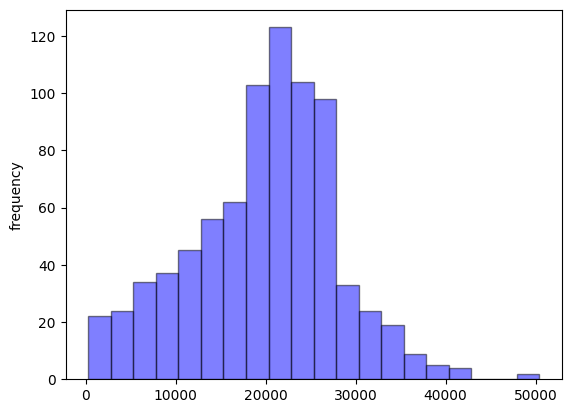

Cylinder


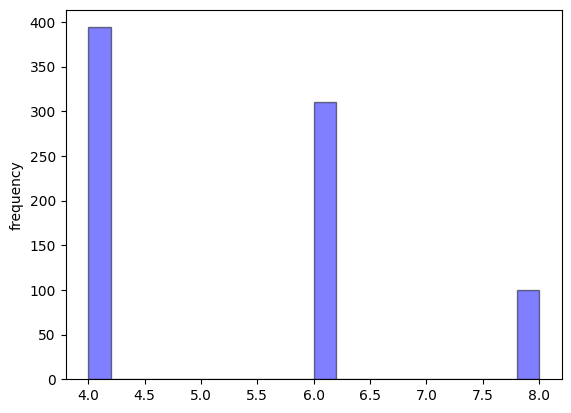

Liter


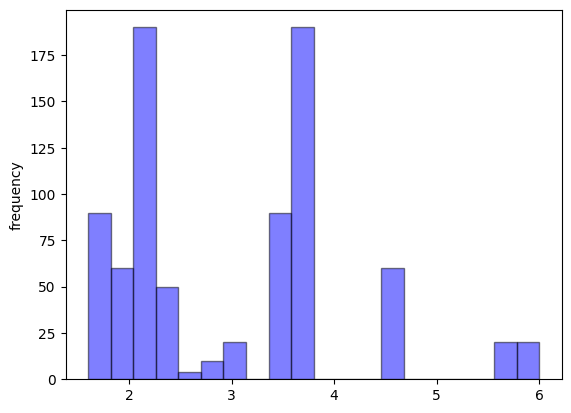

Doors


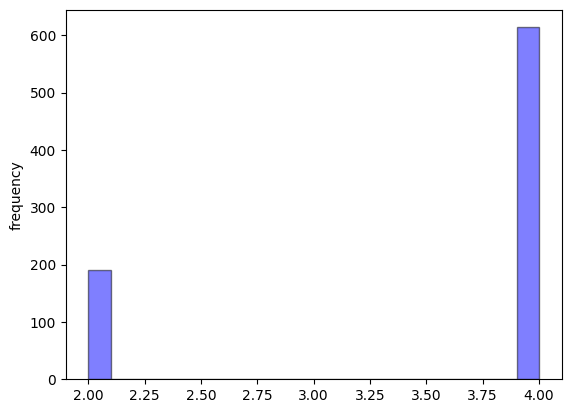

Cruise


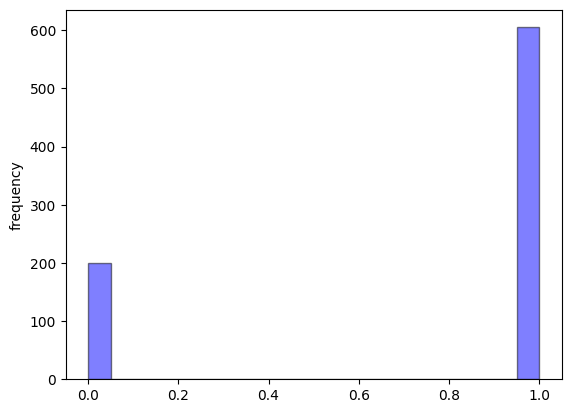

Sound


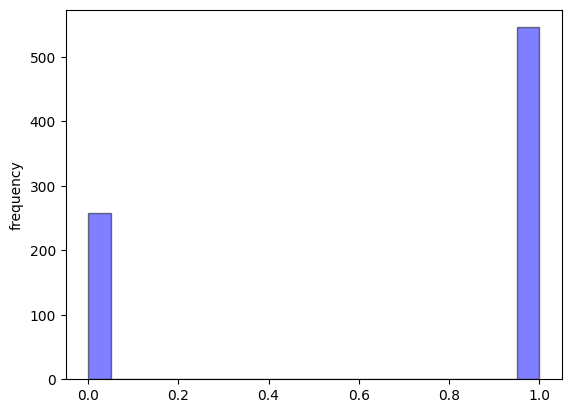

Leather


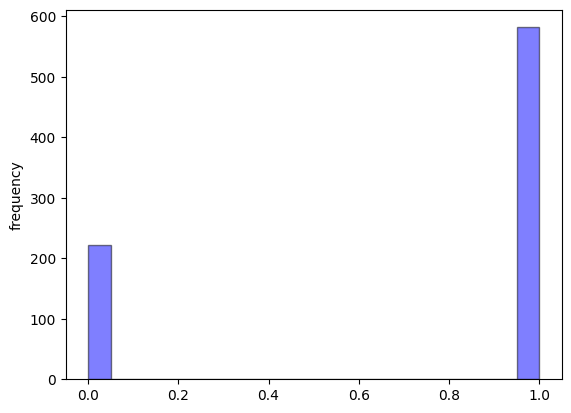

In [17]:
for col in num_col:
    print(col)
    plt.subplot(1,1,1)
    df[col].plot(kind = 'hist', alpha=0.5, bins=20, color='blue', edgecolor='black') 
    plt.ylabel('frequency')
    plt.show()

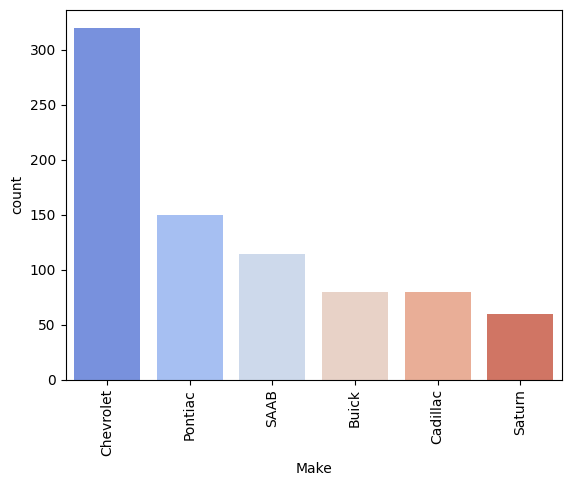

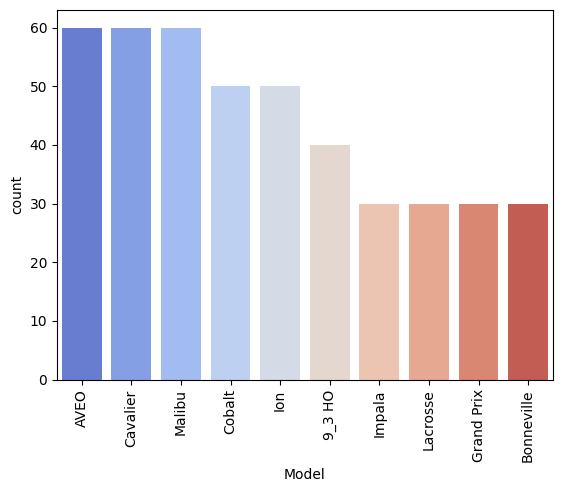

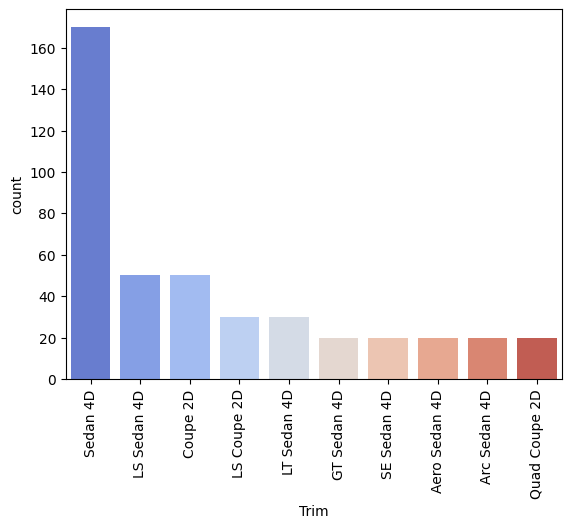

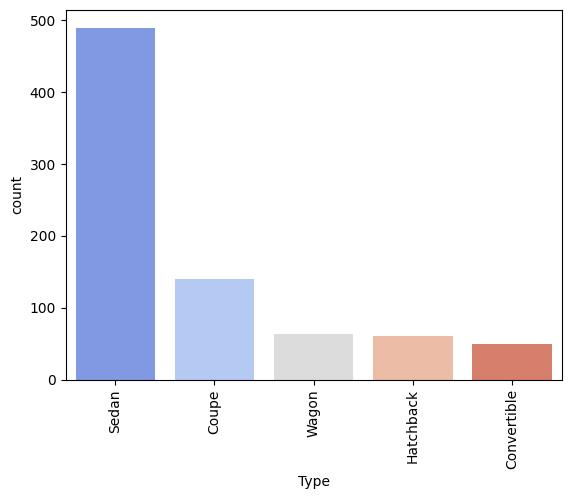

In [23]:
for col in cat_col:
    plt.figure()
    plt.subplot(1,1,1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().head(10).index, palette='coolwarm')
    plt.xticks(rotation=90)
    plt.show()

In [24]:
df['Doors'].value_counts()

Doors
4    614
2    190
Name: count, dtype: int64

In [25]:
X = df[['Mileage','Price']]
y = df['Doors'] 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
model

DecisionTreeClassifier(random_state=42)

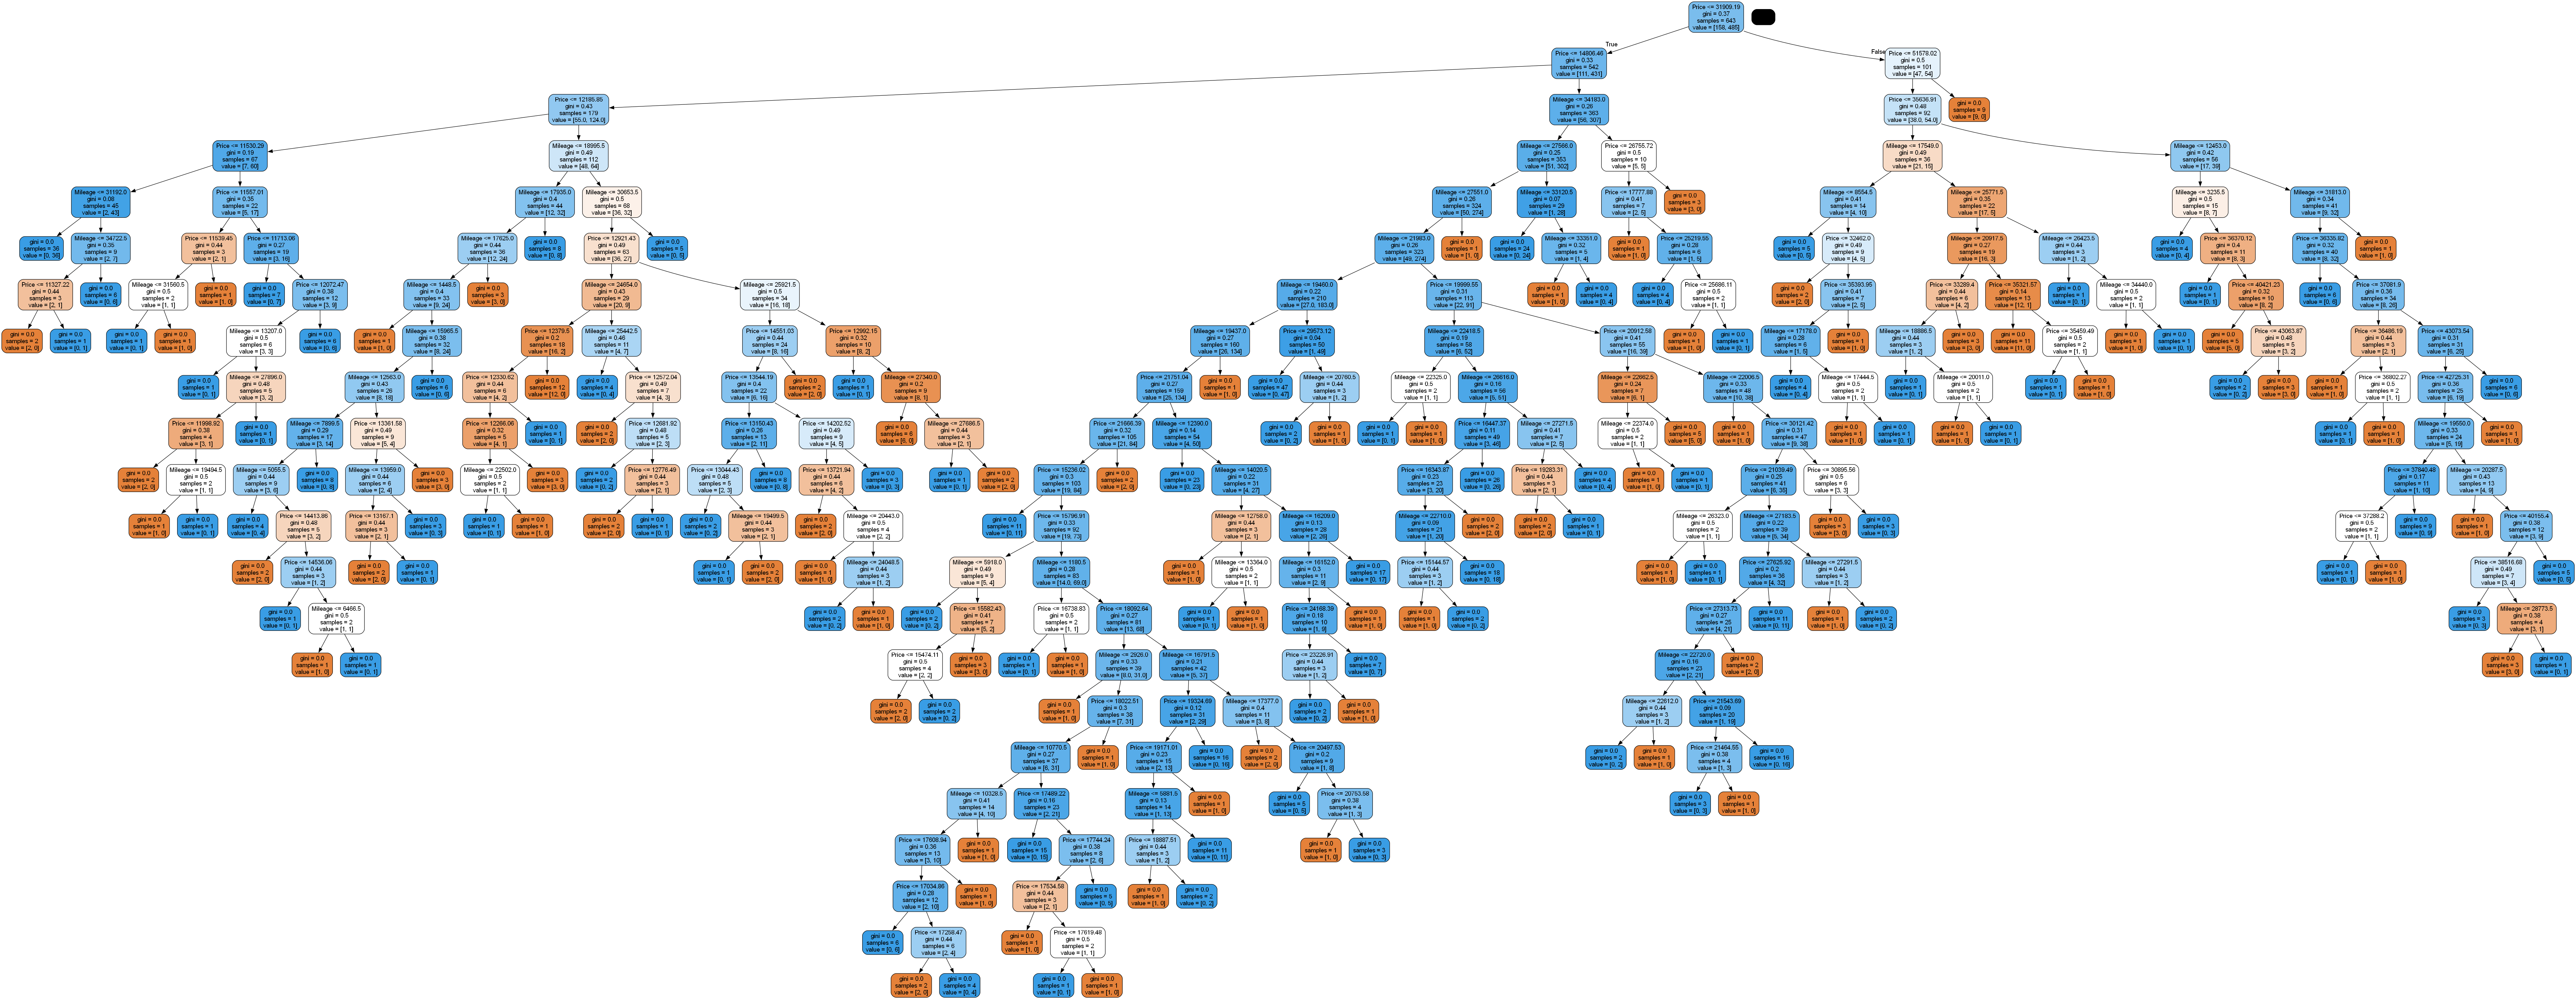

In [30]:
dot_data = export_graphviz(model, out_file= None, feature_names=X_train.columns, precision=2, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [32]:
y_test

192    4
717    4
168    4
522    4
536    2
      ..
658    2
356    2
525    4
748    2
517    4
Name: Doors, Length: 161, dtype: int64

In [33]:
y_pred = model.predict(X_test)
y_pred

array([4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4])

In [34]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7515527950310559
Classification Report:
               precision    recall  f1-score   support

           2       0.40      0.50      0.44        32
           4       0.87      0.81      0.84       129

    accuracy                           0.75       161
   macro avg       0.63      0.66      0.64       161
weighted avg       0.77      0.75      0.76       161

Confusion Matrix:
 [[ 16  16]
 [ 24 105]]


In [35]:
X_train

,Mileage,Price
344,20000,41371.379273
350,7054,39875.854255
443,15903,17162.478255
331,6709,14696.028990
290,13776,14023.938547
...,...,...
71,9795,26060.335350
106,24415,35866.582709
270,4922,14061.122765
435,18721,17173.942322


In [ ]:
new = [[45000, 13000]] 
y_pred = model.predict(new)
print(y_pred[0])

4
